## Predicting online shopper's (customers) purchasing intension using machine learning



## Problem Statement:

Predict if a customers purchasing or not when they visit an online shopping site .

### Aim of the project:

To build a machine learning model based on this information to predict customers purchasing intension. and to find which ML model is best for this dataset

### Scope of the project:

The scope of this project is only limited to predicting customers purchase intension and evaluating and measuring the accuracy of these predictions

## Features:

The numeric variables are:
<ul>
<li> Administrative : Number of pages visited by the visitor about account management </li>

<li> Administrative Duration : Total amount of time (in seconds) spent by the visitor on account management related pages</li> 

<li>Informational : Number of pages visited by the visitor about Web site, communication and address information of the shopping
site </li>

<li>Informational Duration : Total amount of time (in seconds) spent by the visitor on informational pages </li>

<li>Product Related : Number of pages visited by visitor about product related pages </li>

<li>Product-Related Duration : Total amount of time (in seconds) spent by the visitor on product related pages </li>

<li>Bounce Rate : Average bounce rate value of the pages visited by the visitor</li> 

<li>Exit Rate : Average exit rate value of the pages visited by the visitor </li>

<li>Page Value : Average page value of the pages visited by the visitor</li> 

<li>Special Day : Closeness of the site visiting time to a special day</li>
</ul>

The categorical variables are: 
<ul>
<li>Operating system : Operating system of the visitor </li>

<li>Browser : Browser of the visitor </li>

<li>Region : Geographic region from which the session has been started by the visitor</li>

<li>Traffic type : Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)</li>

<li>Visitor type : Whether the visitor is a New Visitor, a Returning Visitor or Other</li>

<li>Weekend : Whether the date of the visit is weekend </li>

<li>Month : Month of the visit </li>

<li>Revenue : Whether the visit has been finalized with a transaction. </li>
     In Revenue TRUE means that the visitor made a purchase, FALSE indicates no purchase was made
    
</ul>


### importing all the tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## models from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## model Evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Priya\OneDrive\Desktop\Python imarticus data files\online_shoppers_intention.csv")

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.shape

(12330, 18)

In [5]:
# checking if the data contains any NULL values

data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
## describe() shows a range of different metrics about your numerical columns such as mean, max and standard deviation.
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Exploratory Data Analysis (EDA)

In [8]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

Text(0, 0.5, 'count')

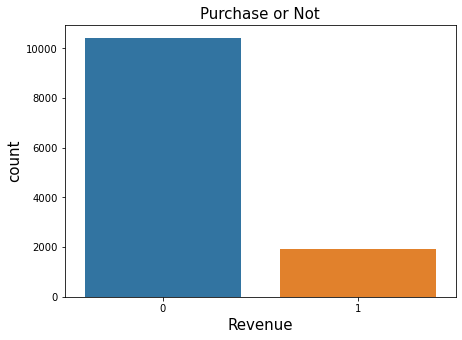

In [94]:
plt.figure(figsize = (7,5))
sns.countplot(data['Revenue']);
plt.title('Purchase or Not', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('count', fontsize = 15)

In the variable revenue, TRUE means that the visitor made a purchase, FALSE indicates no purchase was made.There is a significant data imbalance between the two results of our target variable. 

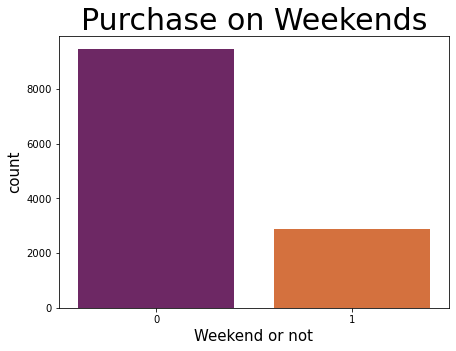

In [96]:
plt.figure(figsize = (7,5))
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

<li>From the above information we see that the distribution of  Weekend data are hightly imbalanced.</li>

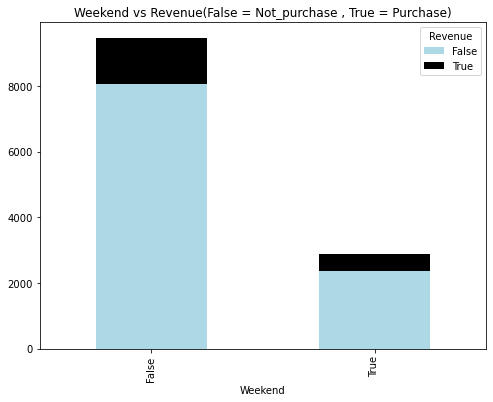

In [18]:
# weekend vs Revenue

df = pd.crosstab(data['Weekend'], data['Revenue'])
df.plot(kind = 'bar',stacked = True, figsize =(8,6), color  = ['lightblue', 'black'])
plt.title('Weekend vs Revenue(False = Not_purchase , True = Purchase)', fontsize = 12)
plt.show()

<li>here both columns are categorical.</li>
<li> when there is no weekend then Purchasing quantity is more. </li>

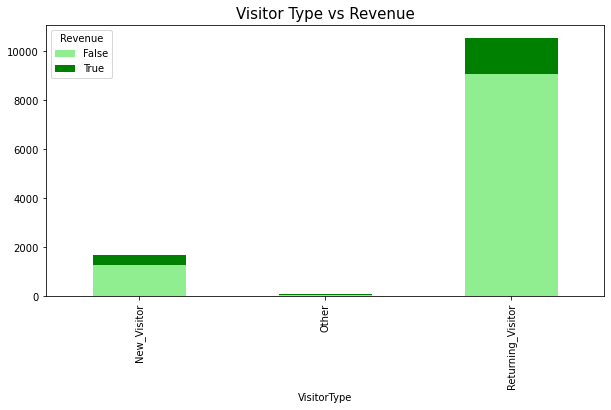

In [20]:
# visitor type vs revenue
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.plot(kind = 'bar',stacked = True, figsize = (10, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 15)
plt.show()

<li>We see here Visitor Type is also a categorical column.</li>
<li>In this visualization, every category is different than others. Returning_Visitors are highly influenced to buy a product.</li>

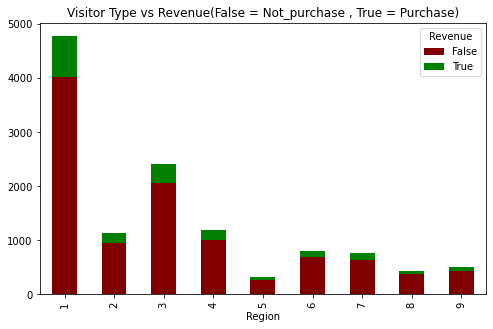

In [21]:
# Region vs revenue
df = pd.crosstab(data['Region'], data['Revenue'])
df.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['maroon', 'green'])
plt.title('Visitor Type vs Revenue(False = Not_purchase , True = Purchase)', fontsize = 12)
plt.show()

In [22]:
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


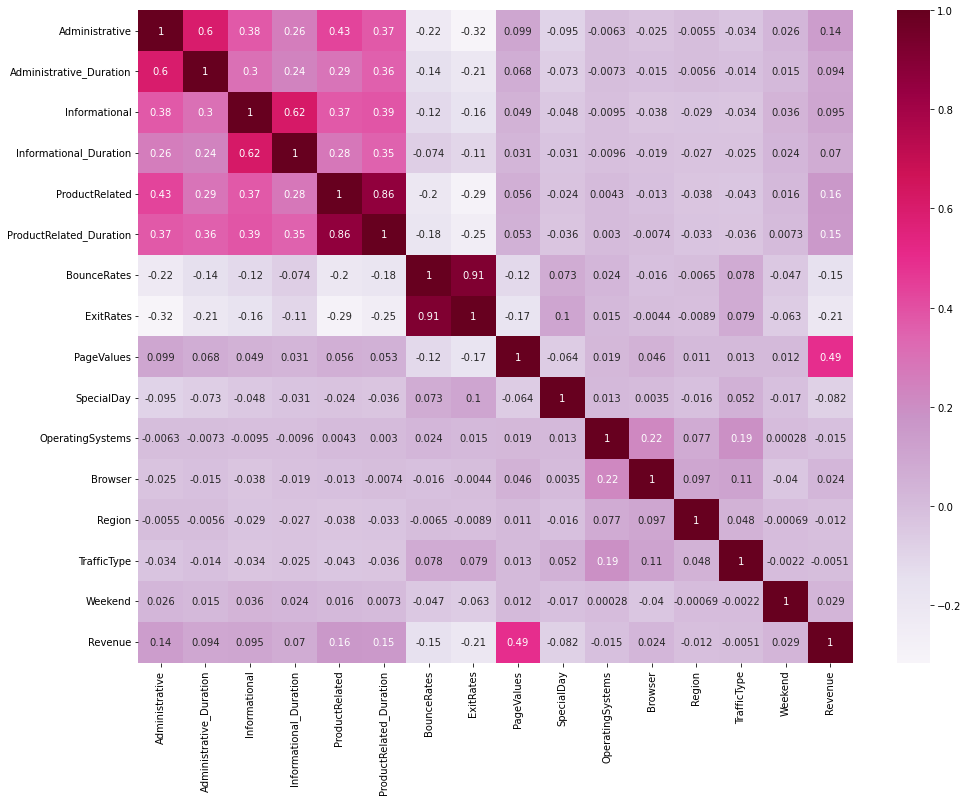

In [23]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True, cmap ="PuRd"); 

In [88]:
corr_list=[]
for i in data.columns:
    corr_list.append(data[i].corr(data.Revenue))
corr_df=pd.DataFrame()
corr_df['colname']=data.columns
corr_df['corr']=corr_list
corr_df.sort_values('corr',ascending=False)

,colname,corr
17,Revenue,1.000000
8,PageValues,0.492569
4,ProductRelated,0.158538
5,ProductRelated_Duration,0.152373
0,Administrative,0.138917
10,Month,0.138719
2,Informational,0.095200
1,Administrative_Duration,0.093587
3,Informational_Duration,0.070345
16,Weekend,0.029295


### A higher positive value means a positive correlation (increase) and a higher negative value meand a negative correlation (decrease)

# Modelling

### Data preprocessing :

In [24]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [25]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [27]:
data.Month.replace({'Feb':2, 'Mar':3, 'May':4, 'Oct':5, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':10},inplace=True)
data.VisitorType.replace({'Returning_Visitor':2, 'New_Visitor':1, 'Other':0},inplace=True)

In [28]:
data.select_dtypes(include='bool').columns

Index(['Weekend', 'Revenue'], dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [30]:
data.Weekend=le.fit_transform(data.Weekend)
data.Revenue=le.fit_transform(data.Revenue)

In [31]:
data.select_dtypes(include='object').columns

Index([], dtype='object')

### Sampling

In [32]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size = 0.2)

### over sampling

In [33]:
data_train.Revenue.value_counts()

0    8321
1    1543
Name: Revenue, dtype: int64

In [34]:
df1       = data_train[data_train.Revenue  == 1]
data_train  = pd.concat([data_train , df1 , df1, df1,df1])
data_train.shape

(16036, 18)

In [35]:
data_train.Revenue.value_counts()

0    8321
1    7715
Name: Revenue, dtype: int64

In [36]:
data_train_x = data_train.iloc[: , 0:-1]
data_train_y = data_train.iloc[: , -1]

data_test_x = data_test.iloc[: , 0:-1]
data_test_y = data_test.iloc[: , -1]

## Now we have got our data split into training and test sets ,it's time to build a machine learning models 

<p><strong>As we working on a classification problem so we are going to try 3 different machine learning models </strong></p>
<ul>
<li> Logistic Regression</li>

<li> Decision Tree </li>

<li>  Random Forest Classifier </li>
 </ul>

## 1.logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(data_train_x , data_train_y)
pred_test  = logreg.predict(data_test_x)

mat_test = confusion_matrix(data_test_y , pred_test)
mat_test

array([[1871,  230],
       [  88,  277]], dtype=int64)

In [39]:
lg_acc = accuracy_score(data_test_y , pred_test)
lg_acc

0.8710462287104623

In [40]:
## classification report of Logistics Regression

print(classification_report(data_test_y , pred_test) )

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2101
           1       0.55      0.76      0.64       365

    accuracy                           0.87      2466
   macro avg       0.75      0.82      0.78      2466
weighted avg       0.89      0.87      0.88      2466



## 2.Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(data_train_x , data_train_y)
pred_test_dt = dt.predict(data_test_x)

mat_dt = confusion_matrix(data_test_y , pred_test_dt)
mat_dt

array([[1921,  180],
       [ 167,  198]], dtype=int64)

In [42]:
dt_acc = accuracy_score(data_test_y , pred_test_dt)
dt_acc

0.8592862935928629

In [43]:
## classification report of DecisionTree

print(classification_report(data_test_y , pred_test_dt) )

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2101
           1       0.52      0.54      0.53       365

    accuracy                           0.86      2466
   macro avg       0.72      0.73      0.73      2466
weighted avg       0.86      0.86      0.86      2466



## 3.Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()

rfc.fit(data_train_x , data_train_y)
pred_test_rfc = rfc.predict(data_test_x)

mat_rfc = confusion_matrix(data_test_y , pred_test_rfc)
mat_rfc

array([[1979,  122],
       [ 118,  247]], dtype=int64)

In [45]:
rfc_acc = accuracy_score(data_test_y , pred_test_rfc)
rfc_acc

0.902676399026764

In [46]:
## classification report of RandomForestClassifier

print(classification_report(data_test_y , pred_test_rfc) )

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2101
           1       0.67      0.68      0.67       365

    accuracy                           0.90      2466
   macro avg       0.81      0.81      0.81      2466
weighted avg       0.90      0.90      0.90      2466



## Model Comparison

In [47]:
Models = ('logistic Regression', 'Decision Tree', 'Random Forest')
Accuracy = (lg_acc, dt_acc, rfc_acc)

In [48]:
model_compare              = pd.DataFrame()
model_compare['Models']    = Models
model_compare['Accuracy']  = Accuracy
model_compare

,Models,Accuracy
0,logistic Regression,0.871046
1,Decision Tree,0.859286
2,Random Forest,0.902676


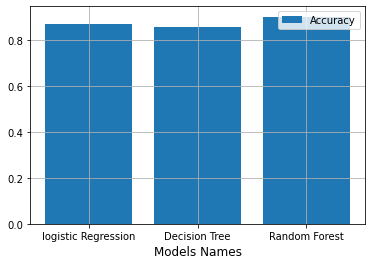

In [49]:
plt.bar(Models, Accuracy , label = 'Accuracy')
plt.xlabel("Models Names", size = 12)
plt.grid()
plt.legend()

## we can't able to identify the which model is best from the graph but looking at the model_compare dataframe , the Random Forest Classifier model performing best.

Let's look at the following

<li> Feature Importance </li>
<li> Hyperparameter tunning</li>
<li> Confusion Matrix </li>
<li> Cross-Validation </li>
<li> Precision </li>
<li> Recall Score </li>
<li> F1 Score </li>
<li> Classification Report </li>

## Feature Selection :

Feature selection will help the algorithm use only the features that have highest weight on the impact on the out of the prediction.

here we use RFE(Recursive feature elimination) : It helps to find out the sequence of the features which are significant

### feature selections of the LogisticRegression model

In [50]:
data_x = data.iloc[:, 0:-1]
data_y = data.iloc[: , -1]

rfe = RFE(logreg, n_features_to_select = 12)

rfe.fit(data_x , data_y)

RFE(estimator=LogisticRegression(), n_features_to_select=12)

In [51]:
rfe_feat_imp = pd.DataFrame()
rfe_feat_imp['features'] = data_x.columns
rfe_feat_imp['IMP']      = rfe.support_

rfe_feat_imp = rfe_feat_imp.sort_values('IMP', ascending = False)

## it gives us a variables which are significant 
l1 = list(rfe_feat_imp.features[0:12]) 
l1.append('Revenue')
data = data.loc[: , l1]

In [52]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.2)

data_train_x = data_train.iloc[: , 0:-1]
data_train_y = data_train.iloc[: , -1]

data_test_x = data_test.iloc[: , 0:-1]
data_test_y = data_test.iloc[: , -1]

In [53]:
## Implementing machine learning algorithm after feature selection

logreg = LogisticRegression()
logreg.fit(data_train_x , data_train_y)
pred_test_lg  = logreg.predict(data_test_x)

mat_test_lg = confusion_matrix(data_test_y , pred_test_lg)
lg_acc = accuracy_score(data_test_y , pred_test_lg)

print(mat_test_lg)
print("accuracy of the Logistic regression model after feature selection is :", lg_acc)

[[2039   38]
 [ 253  136]]
accuracy of the Logistic regression model after feature selection is : 0.8819951338199513


In [54]:
## Cross Validation for LogisticRegression Model
from sklearn.model_selection import cross_val_score

## evaluate model
scores_lg = cross_val_score(logreg, data_train_x, data_train_y, cv = 7)
##Report performance
print("Accuracy of CrossVal:", scores_lg.mean() ,'and', scores_lg.std())

Accuracy of CrossVal: 0.8809812876119144 and 0.003302962303401556


In [55]:
## classification report of LogisticRegression after Feature selection

print(classification_report(data_test_y , pred_test_lg) )

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2077
           1       0.78      0.35      0.48       389

    accuracy                           0.88      2466
   macro avg       0.84      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



### feature selections of the DecisionTreeClasifier model

In [56]:
rfe = RFE(dt, n_features_to_select = 12)

data_x = data.iloc[:, 0:-1]
data_y = data.iloc[: , -1]

rfe.fit(data_x , data_y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=12)

In [57]:
rfe_feat_imp = pd.DataFrame()
rfe_feat_imp['features'] = data_x.columns
rfe_feat_imp['IMP']      = rfe.support_

rfe_feat_imp = rfe_feat_imp.sort_values('IMP', ascending = False)

## it gives us a variables which are significant 
l1 = list(rfe_feat_imp.features[0:12]) 
l1.append('Revenue')
data = data.loc[: , l1]

In [58]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.2)

data_train_x = data_train.iloc[: , 0:-1]
data_train_y = data_train.iloc[: , -1]

data_test_x = data_test.iloc[: , 0:-1]
data_test_y = data_test.iloc[: , -1]

In [59]:
## Implementing machine learning algorithm after feature selection

dt = DecisionTreeClassifier()
dt.fit(data_train_x , data_train_y)
pred_test_dt  = dt.predict(data_test_x)

mat_test_dt = confusion_matrix(data_test_y , pred_test_dt)
dt_acc = accuracy_score(data_test_y , pred_test_dt)

print(mat_test_dt)
print("accuracy of the Logistic regression model after feature selection is :", dt_acc)

[[1902  181]
 [ 167  216]]
accuracy of the Logistic regression model after feature selection is : 0.8588807785888077


In [60]:
## Cross Validation for DecisionTree Model
from sklearn.model_selection import cross_val_score

## evaluate model
scores_dt = cross_val_score(dt, data_train_x, data_train_y, cv = 7)
##Report performance
print("Accuracy of CrossVal:", scores_dt.mean() ,'and', scores_dt.std())

Accuracy of CrossVal: 0.8638493459688512 and 0.007805770401162864


In [61]:
## classification report of DecisionTreeClassifier after Feature selection

print(classification_report(data_test_y , pred_test_dt) )

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2083
           1       0.54      0.56      0.55       383

    accuracy                           0.86      2466
   macro avg       0.73      0.74      0.74      2466
weighted avg       0.86      0.86      0.86      2466



### feature selections of the RandomForestClassifier model

In [62]:
rfe = RFE(rfc, n_features_to_select = 12)

data_x = data.iloc[:, 0:-1]
data_y = data.iloc[: , -1]

rfe.fit(data_x , data_y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=12)

In [63]:
rfe_feat_imp = pd.DataFrame()
rfe_feat_imp['features'] = data_x.columns
rfe_feat_imp['IMP']      = rfe.support_

rfe_feat_imp = rfe_feat_imp.sort_values('IMP', ascending = False)

## it gives us a those variables which are significant 
l1 = list(rfe_feat_imp.features[0:12]) 
l1.append('Revenue')
data = data.loc[: , l1]

In [64]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.2)

data_train_x = data_train.iloc[: , 0:-1]
data_train_y = data_train.iloc[: , -1]

data_test_x = data_test.iloc[: , 0:-1]
data_test_y = data_test.iloc[: , -1]

In [65]:
## Implementing machine learning algorithm after feature selection

rfc = RandomForestClassifier()
rfc.fit(data_train_x , data_train_y)
pred_test_rfc  = rfc.predict(data_test_x)

mat_test_rfc = confusion_matrix(data_test_y , pred_test_rfc)
rfc_acc = accuracy_score(data_test_y , pred_test_rfc)

print(mat_test_rfc)
print("accuracy of the Logistic regression model after feature selection is :", rfc_acc)

[[2000   85]
 [ 168  213]]
accuracy of the Logistic regression model after feature selection is : 0.897404703974047


In [66]:
## Cross Validation for RandomForestClassifier Model
from sklearn.model_selection import cross_val_score

## evaluate model
scores_rfc = cross_val_score(rfc, data_train_x, data_train_y, cv = 7)
##Report performance
print("Accuracy of CrossVal:", scores_rfc.mean() ,'and', scores_rfc.std())

Accuracy of CrossVal: 0.8983177330851101 and 0.007084850335490619


In [68]:
## classification report of RandomForestClassifier after Feature selection

print(classification_report(data_test_y , pred_test_rfc) )

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2085
           1       0.71      0.56      0.63       381

    accuracy                           0.90      2466
   macro avg       0.82      0.76      0.78      2466
weighted avg       0.89      0.90      0.89      2466



## Hyperparameter Tuning with GridSearchCV 

It helps in selecting best combinations of hyper parameter

Since our RandomForestClassifier model provides the best scores so far, we'll try and improve them again using GridSearchCV ...

In [69]:
from sklearn.model_selection import GridSearchCV

### hyperparameter tuning for LogisticRegression model

In [70]:
## different hyperparameter for LogisticRegression model
logreg_grid_search  = {"C"        : np.logspace(-4,4,30),
                       "solver"   : ["liblinear","newton-cg", "lbfgs", "sag", "saga"],
                       "penalty"  : ["l1","l2"]}

## Setup grid hyperparameter search for LogisticRegression model
logreg       = LogisticRegression()
gridS_logreg = GridSearchCV(logreg,
                    param_grid= logreg_grid_search,
                    cv        = 5 ,
                    verbose   = True)

## Fit grid hyperparameter search model
gridS_logreg.fit(data_train_x , data_train_y)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             verbose=True)

In [71]:
## Check the best hyperparameters
gridS_logreg.best_params_

{'C': 0.008531678524172805, 'penalty': 'l1', 'solver': 'liblinear'}

In [72]:
## Evaluating the grid search LogisticRegression model
pred_grid_logreg = gridS_logreg.predict(data_test_x)

In [73]:
mat_grid_logreg = confusion_matrix(data_test_y , pred_grid_logreg)
mat_grid_logreg

array([[2035,   50],
       [ 241,  140]], dtype=int64)

In [74]:
accuracy_score(data_test_y , pred_grid_logreg)

0.8819951338199513

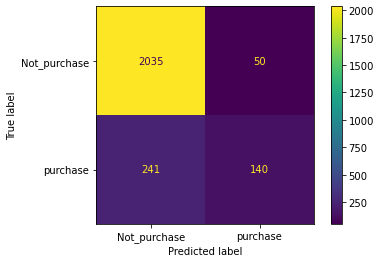

In [75]:
var1 = ConfusionMatrixDisplay(mat_grid_logreg , display_labels = ['Not_purchase', 'purchase'])
var1.plot()

### hyperparameter tuning for DecisionTreeClassifier model

In [76]:
## different hyperparameter for DecisionTreeClassifier model
dt_grid_search = {"criterion"         : ["gini" , "entropy"],
                  "max_depth"         : range(4, 9),
                 'min_samples_split':[2,3,4,5]}

## Setup grid hyperparameter search for DecisionTreeClassifier model
dt       = DecisionTreeClassifier()
gridS_dt = GridSearchCV(dt,
                    param_grid= dt_grid_search,
                    cv        = 5 ,
                    verbose   = True)

## Fit grid hyperparameter search model
gridS_dt.fit(data_train_x , data_train_y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=True)

In [77]:
## Check the best hyperparameters
gridS_dt.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [78]:
## Evaluating the grid search DecisionTreeClassifier model
pred_grid_dt = gridS_dt.predict(data_test_x)

In [79]:
mat_grid_dt = confusion_matrix(data_test_y , pred_grid_dt)
mat_grid_dt

array([[2019,   66],
       [ 182,  199]], dtype=int64)

In [80]:
accuracy_score(data_test_y , pred_grid_dt)

0.8994322789943228

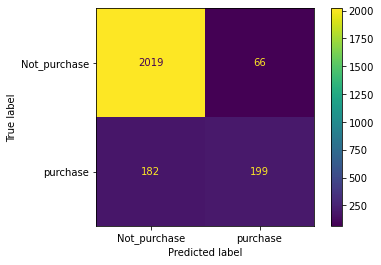

In [81]:
var1 = ConfusionMatrixDisplay(mat_grid_dt , display_labels = ['Not_purchase', 'purchase'])
var1.plot()

### hyperparameter tuning for RandomForestClassifier model

In [85]:
## different hyperparameter for RandomForestClassifier model
rfc_grid_search = {"criterion"        : ["gini" , "entropy"],
                   "max_depth"        : range(4, 20),
                   "max_features"     : ["sqrt"],
                   "bootstrap"        : ['False']}

## Setup grid hyperparameter search for RandomForestClassifier model
rfc       = RandomForestClassifier()
gridS_rfc = GridSearchCV(rfc,
                        param_grid= rfc_grid_search)

## Fit grid hyperparameter search model
gridS_rfc.fit(data_train_x , data_train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': ['False'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 20), 'max_features': ['sqrt']})

In [86]:
## Check the best hyperparameters
gridS_rfc.best_params_

{'bootstrap': 'False',
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt'}

In [87]:
## Evaluating the grid search RandomForestClassifier model
pred_grid_rfc = gridS_rfc.predict(data_test_x)

In [88]:
mat_grid_rfc = confusion_matrix(data_test_y , pred_grid_rfc)
mat_grid_rfc

array([[2023,   62],
       [ 169,  212]], dtype=int64)

In [89]:
accuracy_score(data_test_y , pred_grid_rfc)

0.9063260340632603

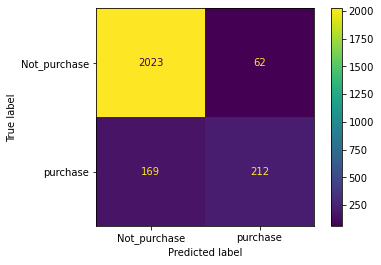

In [90]:
var1 = ConfusionMatrixDisplay(mat_grid_rfc , display_labels = ['Not_purchase', 'purchase'])
var1.plot()

In essence, there are 162 occasions where model predicted 0 (Not_purchase) when it should have been 1 (purchase) and 68 occasions where the model predicted 1 (purchase) instead of 0 (Not_purchase)

## Evaluating our tuned machine learning classifier, beyond accuracy


<li> Precision </li>
<li> Recall Score </li>
<li> F1 Score </li>
<li> Classification Report </li>

### Let's get a classification report after Hyperparameter tuning where in we get precision , recall and f1_score 

In [91]:
from sklearn.metrics import classification_report

In [83]:
## classification report of LogisticRegression

print(classification_report(data_test_y , pred_grid_logreg) )

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2085
           1       0.74      0.37      0.49       381

    accuracy                           0.88      2466
   macro avg       0.82      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



In [84]:
## classification report of DecisionTreeClassifier

print(classification_report(data_test_y , pred_grid_dt) )

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2085
           1       0.75      0.52      0.62       381

    accuracy                           0.90      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.89      0.90      0.89      2466



In [92]:
## classification report of RandomForestClassifier

print(classification_report(data_test_y , pred_grid_rfc) )

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2085
           1       0.77      0.56      0.65       381

    accuracy                           0.91      2466
   macro avg       0.85      0.76      0.80      2466
weighted avg       0.90      0.91      0.90      2466



## Conclusion :
 
<li>Here we can conclude that Random Forest Model is the best suited model for this data.</li>
    
<li>Before feature selection having accuracy = 90, recall_score= 68, precision = 67, F1_score = 67 . </li>
<li> and after feature selection having accuracy = 89.74, recall_score= 56 , precision = 71 , F1_score = 63 .</li>
 <li> and the accuracy after Hyperparameter tuning accuracy = 90.63, recall_score= 56 , precision = 77, F1_score = 65 .</li>
<li> Highest Accuracy achieved : 90.63% using Random Forest 